In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings


In [2]:
lamok = pd.read_csv('dataset\\dengue.csv')

In [3]:
lamok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
lamok.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
lamok.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [6]:
lamok['Region'] = lamok['Region'].astype('category')

In [7]:
lamok.dtypes

Month              object
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
lamok['Dengue_Cases']

0       705
1       374
2       276
3       240
4       243
       ... 
1015     91
1016     16
1017     13
1018     15
1019     23
Name: Dengue_Cases, Length: 1020, dtype: int64

<h1>Insight 1 -  Total Dengue Cases per Year</h1>

C:\Users\User\AppData\Local\Temp\ipykernel_45452\1112769507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_per_year.index, y=cases_per_year.values, palette='Blues')


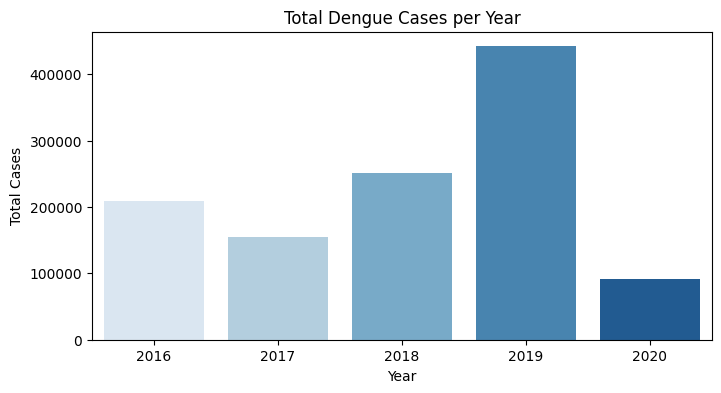

In [9]:
cases_per_year = lamok.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=cases_per_year.index, y=cases_per_year.values, palette='Blues')
plt.title("Total Dengue Cases per Year")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.show()

<h2>Dengue cases rose from 209,544 in 2016 to a peak of 441,902 in 2019. This shows a growing trend over the years. In 2020, cases suddenly dropped to 91,041, likely due to COVID-19 lockdowns, which limited outdoor exposure and mosquito contact..</h2>

<h1>Insights 2 - Total Dengue Deaths per year</h1>

C:\Users\User\AppData\Local\Temp\ipykernel_45452\1367563065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_per_year.index, y=deaths_per_year.values, palette='Reds')


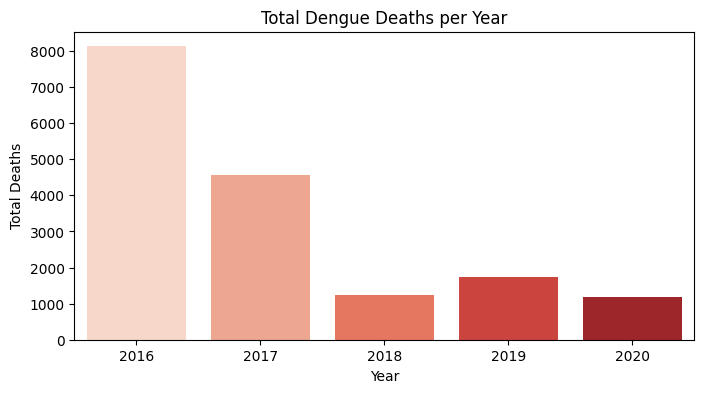

In [10]:
deaths_per_year = lamok.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=deaths_per_year.index, y=deaths_per_year.values, palette='Reds')
plt.title("Total Dengue Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()

<h2>Dengue deaths were highest in 2016 at 8,127, then significantly decreased each year, reaching only 1,195 in 2020. This suggests improved healthcare response, early diagnosis, or possibly better public awareness over time.</h2>

<h1>Insights 3 - Total dengue cases by Region</h1>

C:\Users\User\AppData\Local\Temp\ipykernel_45452\14328825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_by_region = lamok.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_45452\14328825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cases_by_region.index, x=cases_by_region.values, palette='coolwarm')


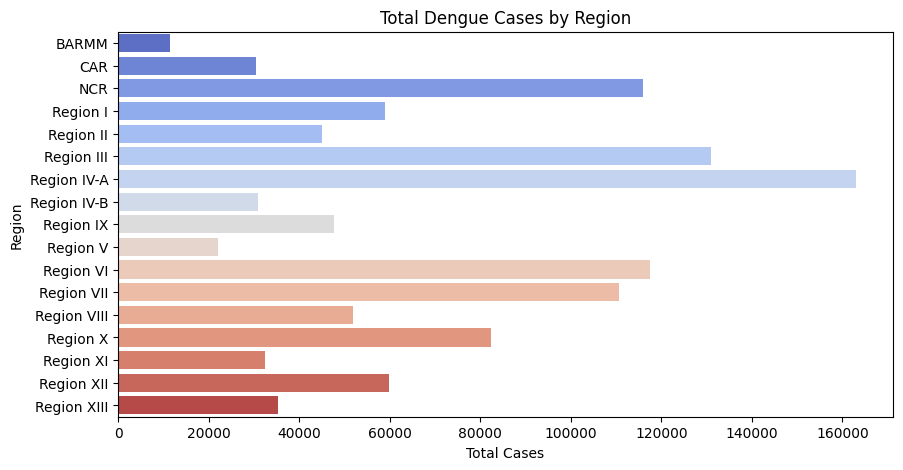

In [11]:
cases_by_region = lamok.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(y=cases_by_region.index, x=cases_by_region.values, palette='coolwarm')
plt.title("Total Dengue Cases by Region")
plt.xlabel("Total Cases")
plt.ylabel("Region")
plt.show()

<h2>Region IV-A recorded the highest number of dengue cases at 163,029, followed by Region III and Region VI. This suggests that densely populated or urban areas may be more vulnerable. Meanwhile, BARMM had the lowest cases with 11,537, possibly due to lower population density or reporting differences.</h2>

<h1>Insights 4 - Total Dengue Deaths by Region</h1>

C:\Users\User\AppData\Local\Temp\ipykernel_45452\1182611559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_by_region = lamok.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_45452\1182611559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=deaths_by_region.index, x=deaths_by_region.values, palette='magma')


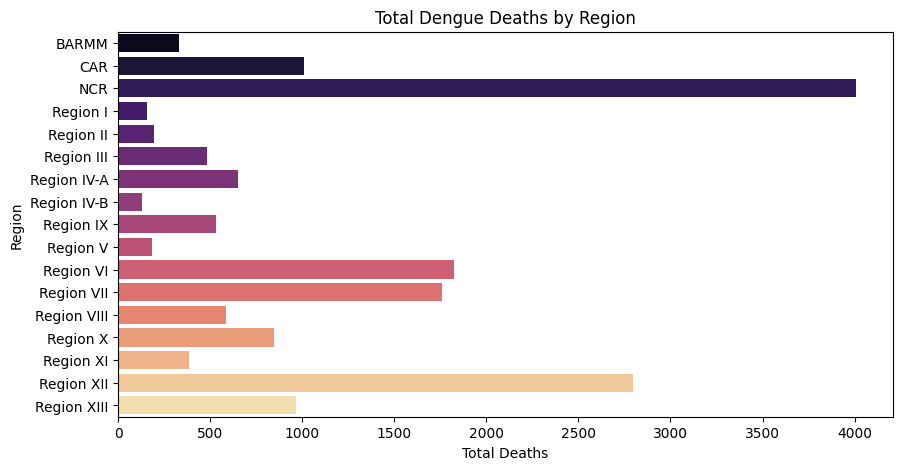

In [12]:
deaths_by_region = lamok.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(y=deaths_by_region.index, x=deaths_by_region.values, palette='magma')
plt.title("Total Dengue Deaths by Region")
plt.xlabel("Total Deaths")
plt.ylabel("Region")
plt.show()

<h2>NCR recorded the highest deaths (4,008), while Region IV-B had the lowest (130). This shows that more crowded areas may face higher dengue risks.</h2>

<h1> Insights 5 -  Yearly Trend of Dengue Cases</h1>

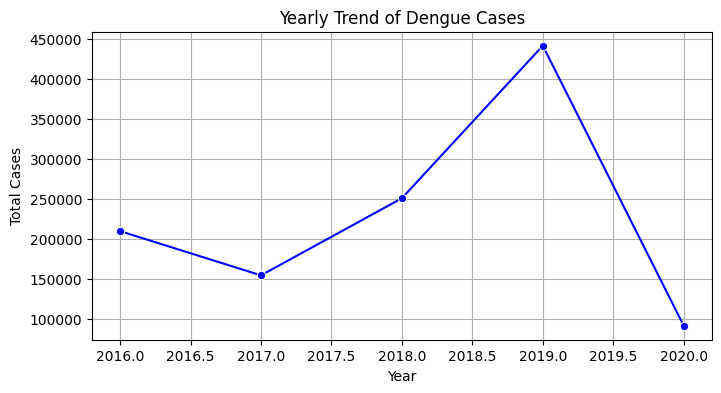

In [13]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=cases_per_year.index, y=cases_per_year.values, marker='o', color='blue')
plt.title("Yearly Trend of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid()
plt.show()

<h2>the result show that dengue cases in 2019 is high and in 2020 it drop </h2>

<h1>Insights 6 - Yearly Trend of Dengue Deaths</h1>

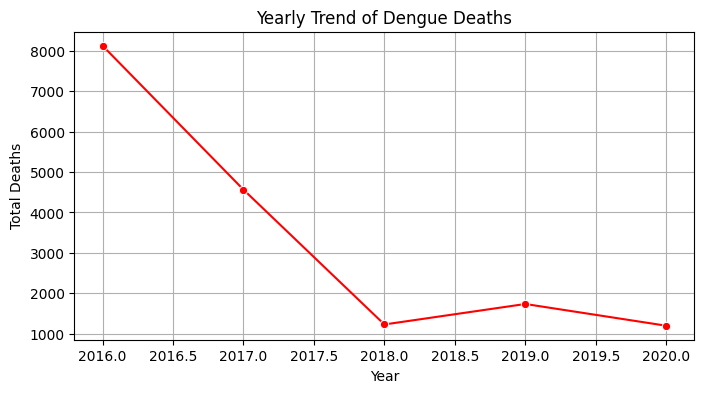

In [14]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=deaths_per_year.index, y=deaths_per_year.values, marker='o', color='red')
plt.title("Yearly Trend of Dengue Deaths")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid()
plt.show()

<h1>insights 7 -  Month-wise Dengue Cases</h1>

C:\Users\User\AppData\Local\Temp\ipykernel_45452\1749546797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_by_month.index, y=cases_by_month.values, palette='viridis')


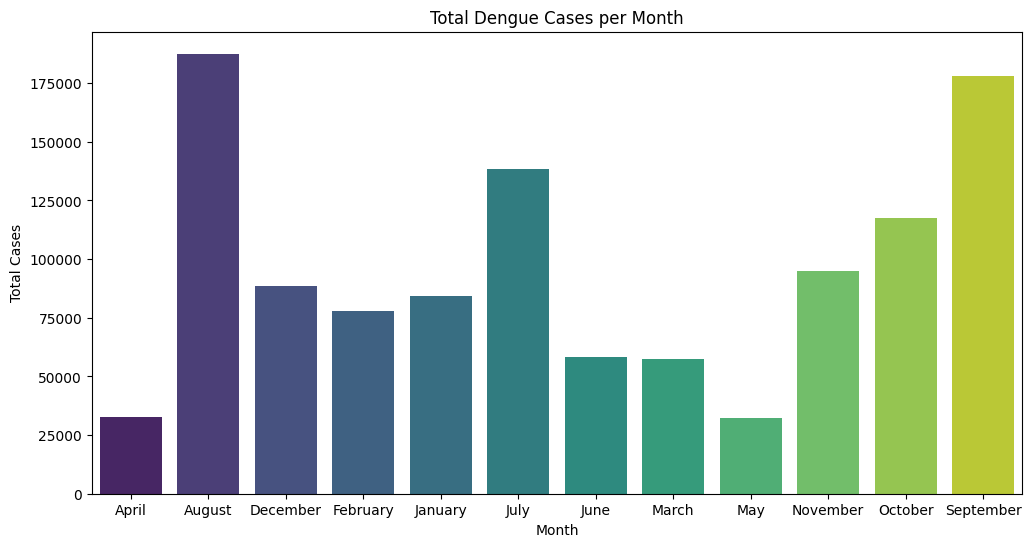

In [15]:
cases_by_month = lamok.groupby('Month')['Dengue_Cases'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=cases_by_month.index, y=cases_by_month.values, palette='viridis')
plt.title("Total Dengue Cases per Month")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.show()

<h1>Insights 8 -  Month-wise Dengue Deaths</h1>

C:\Users\User\AppData\Local\Temp\ipykernel_45452\552528631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_by_month.index, y=deaths_by_month.values, palette='inferno')


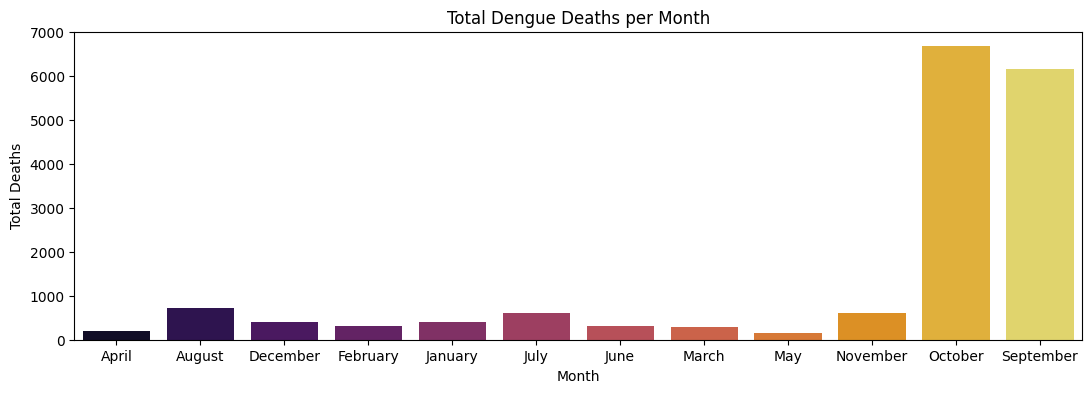

In [16]:
deaths_by_month = lamok.groupby('Month')['Dengue_Deaths'].sum()
plt.figure(figsize=(13, 4))
sns.barplot(x=deaths_by_month.index, y=deaths_by_month.values, palette='inferno')
plt.title("Total Dengue Deaths per Month")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.show()

<h1>Insights 9 - Region with the Highest Dengue Cases</h1>

In [17]:
highest_case_region = cases_by_region.idxmax()
print(f"Region with Highest Dengue Cases: {highest_case_region}")

Region with Highest Dengue Cases: Region IV-A


<h1>Insights 10 - Region with the Highest Dengue Death</h1>

In [18]:
highest_death_region = deaths_by_region.idxmax()
print(f"Region with Highest Dengue Deaths: {highest_death_region}")


Region with Highest Dengue Deaths: NCR


<h1>Insights 11 - Top 5 Regions with Most Dengue Cases  </h1>

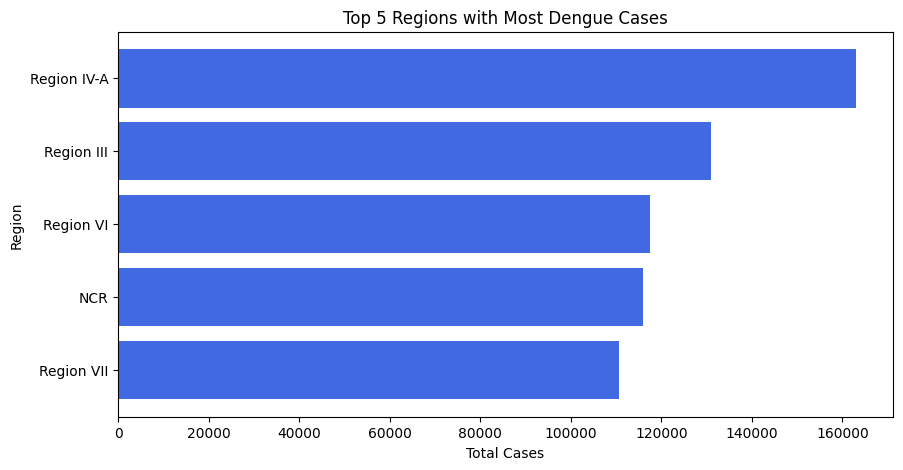

In [19]:
top5_cases = cases_by_region.head(5)

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top5_cases.index, top5_cases.values, color='royalblue')
ax.set_title("Top 5 Regions with Most Dengue Cases", fontsize=12)
ax.set_xlabel("Total Cases", fontsize=10)
ax.set_ylabel("Region", fontsize=10)
plt.gca().invert_yaxis()  
plt.show()


<h1>Insights 12 - Top 5 Regions with Most Dengue Deaths  </h1>

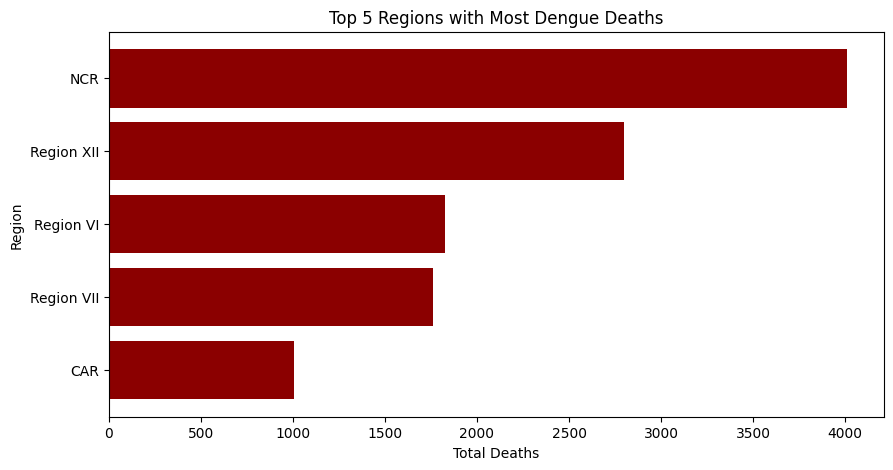

In [20]:
top5_deaths = deaths_by_region.head(5)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top5_deaths.index, top5_deaths.values, color='darkred')
ax.set_title("Top 5 Regions with Most Dengue Deaths", fontsize=12)
ax.set_xlabel("Total Deaths", fontsize=10)
ax.set_ylabel("Region", fontsize=10)

plt.gca().invert_yaxis()  
plt.show()


<h1> Insights 13 -  Correlation between Dengue Cases & Deaths</h1>

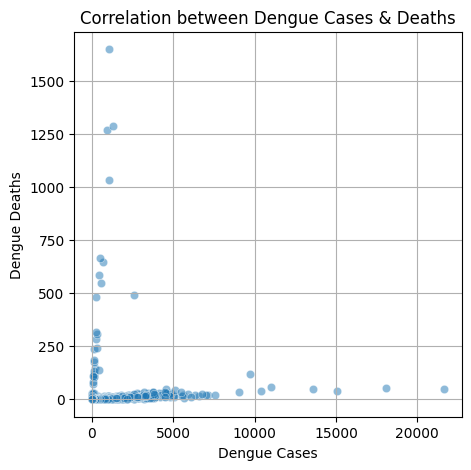

In [21]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=lamok['Dengue_Cases'], y=lamok['Dengue_Deaths'], alpha=0.5)
plt.title("Correlation between Dengue Cases & Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid()
plt.show()


<h1> Insights 14 -  Average Dengue Cases</h1>

In [22]:
avg_cases = cases_per_year.mean()
print(f"Average Dengue Cases per Year: {avg_cases:.0f}")

Average Dengue Cases per Year: 229485


<h1> Insights 15 -  Average Dengue Deaths</h1>

In [23]:
avg_deaths = deaths_per_year.mean()
print(f"Average Dengue Deaths per Year: {avg_deaths:.0f}")

Average Dengue Deaths per Year: 3369


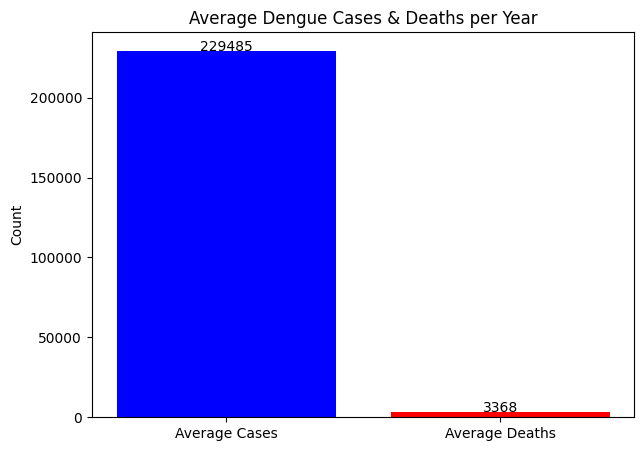

In [24]:
categories = ["Average Cases", "Average Deaths"]
values = [avg_cases, avg_deaths]
plt.figure(figsize=(7, 5))
plt.bar(categories, values, color=['blue', 'red'])
plt.title("Average Dengue Cases & Deaths per Year", fontsize=12)
plt.ylabel("Count", fontsize=10)
for i, v in enumerate(values):
    plt.text(i, v + 100, f"{int(v)}", ha='center', fontsize=10)

plt.show()

<h1> Insights 16 -  Highest cases in months</h1>

In [25]:
highest_case_month = cases_by_month.idxmax()
print(f"Month with Highest Dengue Cases: {highest_case_month}")

Month with Highest Dengue Cases: August


<h1> Insights 17 -  Lowest cases in months</h1>

In [26]:
lowest_case_month = cases_by_month.idxmin()
print(f"Month with Lowest Dengue Cases: {lowest_case_month}")

Month with Lowest Dengue Cases: May


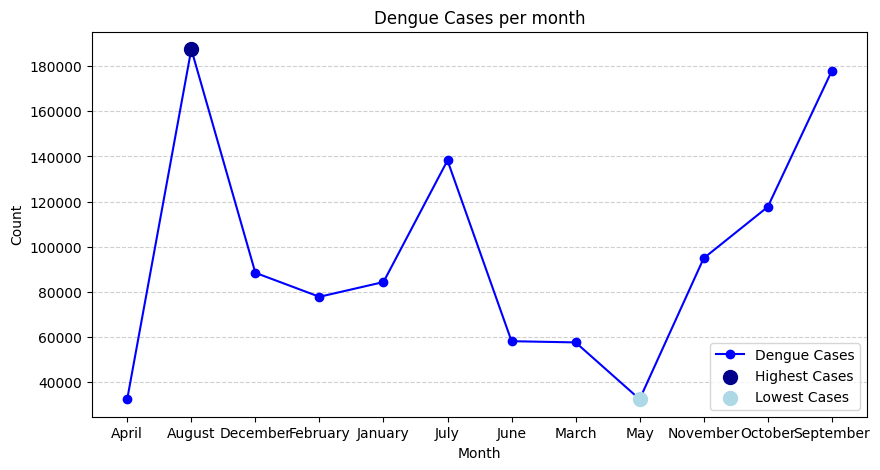

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(cases_by_month.index, cases_by_month.values, marker='o', linestyle='-', color='blue', label="Dengue Cases")
plt.scatter(highest_case_month, cases_by_month.max(), color='darkblue', s=100, label="Highest Cases", zorder=3)
plt.scatter(lowest_case_month, cases_by_month.min(), color='lightblue', s=100, label="Lowest Cases", zorder=3)
plt.title("Dengue Cases per month", fontsize=12)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<h1> Insights 18 -  Highest months for deaths</h1>

In [28]:
highest_death_month = deaths_by_month.idxmax()
print(f"Month with Highest Dengue Deaths: {highest_death_month}")

Month with Highest Dengue Deaths: October


<h1> Insights 19 -  lowest months for deaths</h1>

In [29]:
lowest_death_month = deaths_by_month.idxmin()
print(f"Month with Lowest Dengue Deaths: {lowest_death_month}")

Month with Lowest Dengue Deaths: May


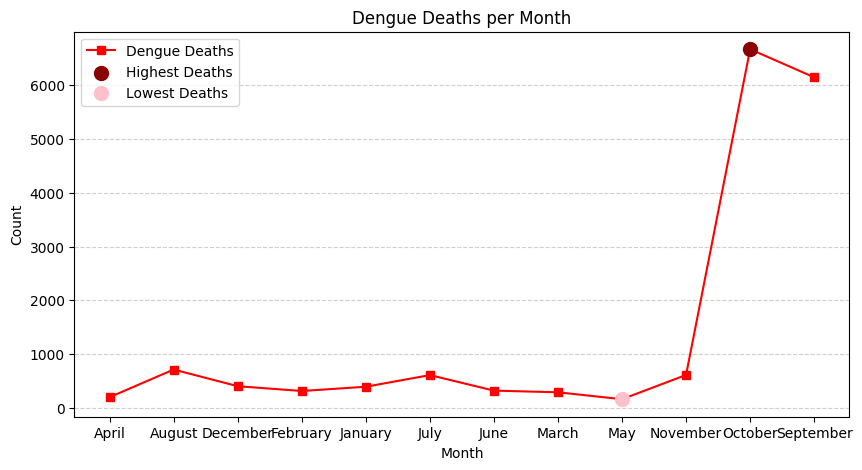

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(deaths_by_month.index, deaths_by_month.values, marker='s', linestyle='-', color='red', label="Dengue Deaths")
plt.scatter(highest_death_month, deaths_by_month.max(), color='darkred', s=100, label="Highest Deaths", zorder=3)
plt.scatter(lowest_death_month, deaths_by_month.min(), color='pink', s=100, label="Lowest Deaths", zorder=3)
plt.title("Dengue Deaths per Month", fontsize=12)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<h1> Insights 20 -  Dengue Case Fatality Rate per Year</h1>

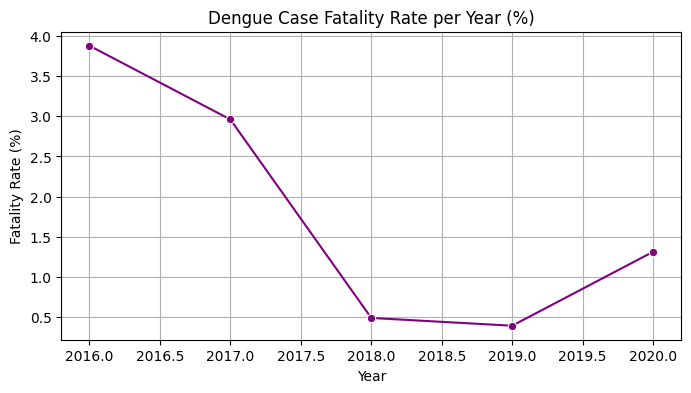

In [31]:
fatality_rate = (deaths_per_year / cases_per_year) * 100
plt.figure(figsize=(8, 4))
sns.lineplot(x=fatality_rate.index, y=fatality_rate.values, marker='o', color='purple')
plt.title("Dengue Case Fatality Rate per Year (%)")
plt.xlabel("Year")
plt.ylabel("Fatality Rate (%)")
plt.grid()
plt.show()